In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
data_abb = pd.read_csv('clean_listings.csv')

In [2]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
data_abb=data_abb[data_abb.price>0]
data_abb=data_abb[data_abb.availability_365>0]

In [3]:
data_abb.neighbourhood_group.value_counts()

Manhattan        13199
Brooklyn         12046
Queens            4451
Bronx              985
Staten Island      308
Name: neighbourhood_group, dtype: int64

In [4]:
data_abb.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30989.000000,3.098900e+04,3.098900e+04,30989.000000,30989.000000,30989.000000,30989.000000,30989.000000,25653.000000,30989.000000,30989.000000
mean,28754.943625,2.428352e+07,9.781194e+07,40.727881,-73.946871,170.705541,9.217012,31.226822,1.815011,10.754848,184.076479
std,15098.329455,1.277387e+07,1.004174e+08,0.056728,0.053112,399.661973,26.784313,50.828467,1.759268,40.764932,130.447801
min,0.000000,2.595000e+03,2.571000e+03,40.499790,-74.247870,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,16881.000000,1.411041e+07,1.057157e+07,40.688060,-73.983320,70.000000,2.000000,2.000000,0.450000,1.000000,64.000000
50%,31414.000000,2.709038e+07,5.141459e+07,40.722970,-73.953300,113.000000,3.000000,10.000000,1.250000,1.000000,165.000000
75%,41907.000000,3.583560e+07,1.810749e+08,40.762470,-73.927940,188.000000,5.000000,38.000000,2.730000,3.000000,332.000000
max,50598.000000,4.058402e+07,3.143682e+08,40.916860,-73.712990,10000.000000,1250.000000,630.000000,28.480000,310.000000,365.000000


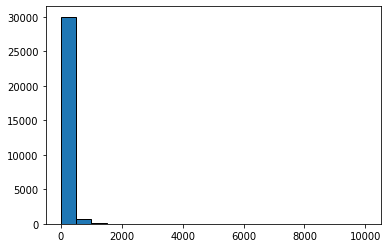

In [5]:
bins = [x for x in range(0,10500,500)]
plt.hist(data_abb['price'].values, bins=bins, edgecolor="k")


plt.show()

In [6]:
# Setting the target variable and independent variable
X=['minimum_nights','number_of_reviews','availability_365','room_type','neighbourhood_group']
y='price'

In [7]:
data_X=data_abb[X]
data_y=data_abb[y]
data_X.head()
print(data_X.shape)
print(data_y.shape)

(30989, 5)
(30989,)


In [8]:
# encoding the categorical data for making data suitable for machine to learn
X=pd.get_dummies(data_X,prefix_sep='_',drop_first=True)
X.shape

(30989, 10)

In [9]:
X.head()

,minimum_nights,number_of_reviews,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,10,48,1,0,0,0,0,1,0,0
1,1,295,1,0,0,0,1,0,0,0
2,3,78,19,0,0,0,0,1,0,0
3,29,49,365,0,1,0,1,0,0,0
4,2,454,242,0,1,0,0,1,0,0


In [10]:
# ML 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,data_y,test_size=0.25,random_state=1)

In [11]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.6156111578502758

        Mean Squared Error: 407.2302533609815
        R2 Score: 7.322849209336635
        Mean Absolute Error: 96.15465426688623
     
